# Home assignment - Non-Neural Machine Learning (ITLB358, MIB)
---
## Task description
You will process real-life data which includes the prices of a digital currency.
- The data represents historical daily time series for a digital currency (BTC) traded on the Saudi market (SAR/Sudi Riyal).
- Prices and volumes are quoted in both SAR & USD.
- Data date range: 11.05.2018 to 30.01.2021

### Your task is as follows:
- What are the steps if the dataset were "big data"?
	- Theoretical question!
	- Please create a code in a markdown cell, which represents a basic big data pipeline (with explicative steps).
	- If you want use pseudo code.
- Download the Digital currency dataset from google drive
	- `!wget "https://drive.google.com/uc?export=download&id=1ogo2n89jpuDPVoA4HXliB15oPF54Ewav" -O "dig_curr.csv"`
- Clean the data as necessary
- Modelling:
	- Regression
		- Linear Regression (baseline)
		- Random forest regressor
		- Split data into inputs and outputs
		- Split data into train and test set
		- Input features:
			- year, open_SAR, open_USD, high_SAR, high_USD, low_SAR, low_USD, close_SAR, volume
		- Output feature(s):
			- close_USD
			- Try to predict 2 different periods (1 day / 2 days ahead) on the test set!
- Reflection
	- Critically evaluate your work, including other approaches.
	- Answer in a markdown cell.


___
# Home Assignement - Predict stock prices using regression
## Big Data - Theoretical Question
Most of the steps are the same when treating it as big data. The most striking difference is the utilization of cloud service providers such as Microsoft Azure, Amazon Web Services, Oracle Cloud and more, to provide the computational power instead of loading into memory on your own machine. 

## Step 1 - install necessary libraries
The first step is to install the necessary libraries. In case you are using a Linux distribution or Macintosh use:
```bash
pip3 install numpy pandas matplotlib sklearn 
```
in the case that your operating system is Windows use:
```bash
pip install numpy pandas matplotlib sklearn 
```
## Step 2 - Visualize the data

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1ogo2n89jpuDPVoA4HXliB15oPF54Ewav" -O "dig_curr.csv"

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [2]:
# generate a seed for reproductibility
random_seed = 69420
np.random.seed(random_seed)

# read the data and clean it
df = pd.read_csv('dc.csv', parse_dates=["Unnamed: 0"])
# rename the un-named column re-index the dataset to the 'date' column
df.rename(columns= {"Unnamed: 0" : "date"}, inplace=True)
df.set_index("date", inplace=True)
# sort the data by date
df.sort_index(ascending=True, inplace=True)
# drop NaN values
df.dropna(inplace=True)
df.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
date,,,,,,,,,
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227


In [3]:
# inspect the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2018-05-07 to 2021-01-30
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open_SAR   1000 non-null   float64
 1   open_USD   1000 non-null   float64
 2   high_SAR   1000 non-null   float64
 3   high_USD   1000 non-null   float64
 4   low_SAR    1000 non-null   float64
 5   low_USD    1000 non-null   float64
 6   close_SAR  1000 non-null   float64
 7   close_USD  1000 non-null   float64
 8   volume     1000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 78.1 KB
None


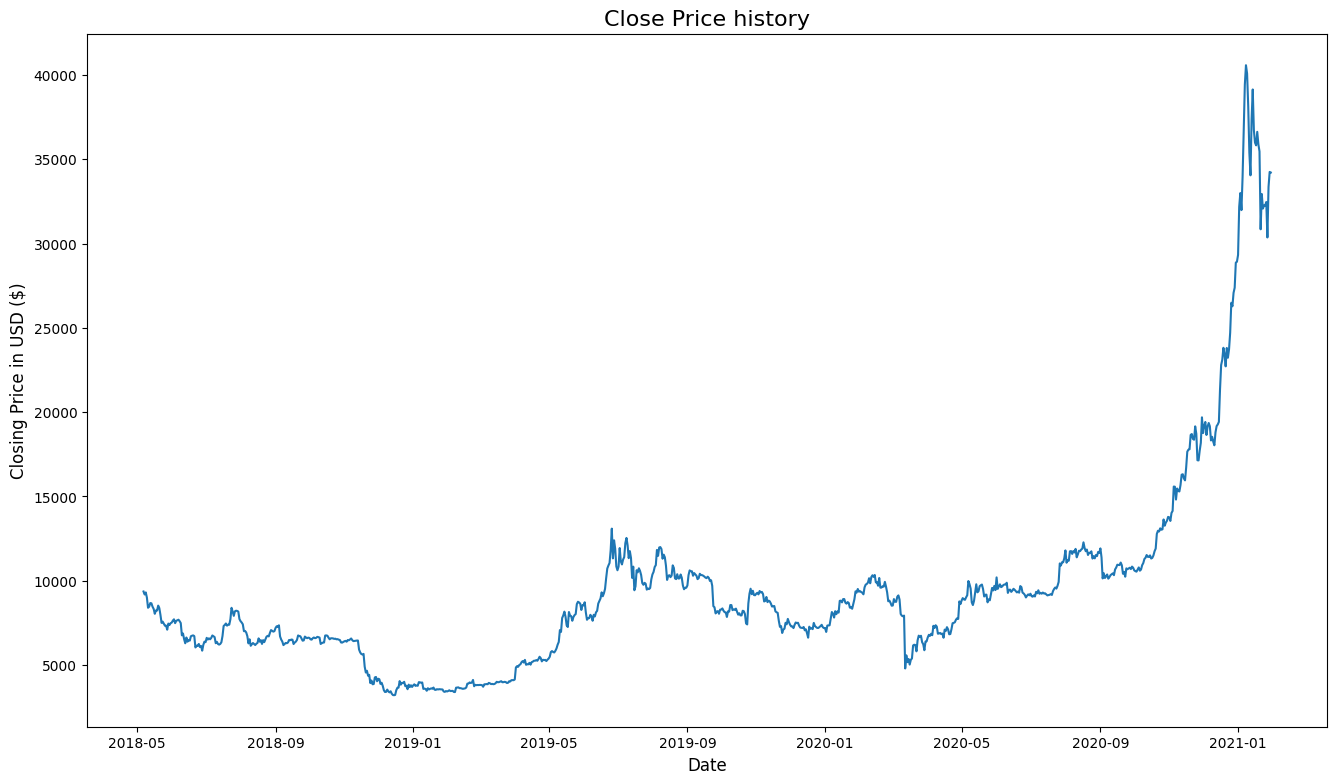

In [4]:
# visualize the data
fig, ax = plt.subplots(figsize=(16,9))
plt.plot(df["close_USD"])
ax.set_title('Close Price history', fontsize = 16)
ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Closing Price in USD ($)', fontsize = 12)
plt.show()

## Predict Stock Prices 

### Linear Regression Model (Baseline)

In [5]:
# set the X and the Y to train and test data
x = df.loc[:, df.columns != 'close_USD']
y = df['close_USD']

# splitting the datasets into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True, train_size=0.2, random_state=random_seed)

In [6]:
# Optional - it is a good practice to visualize the data
print("X_train:\t")
print(X_train)
print("----------")
print("X_test:")
print(X_test)
print("----------")
print("y_train:")
print(y_train)
print("----------")
print("y_test:")
print(y_test)
print()
print("Ratio of 1 in y in train: {0:.2f}%".format(sum(y_train)/len(y_train)*100))
print("Ratio of 1 in y in test: {0:.2f}%".format(sum(y_test)/len(y_test)*100))

X_train:	
                open_SAR  open_USD      high_SAR  high_USD       low_SAR  \
date                                                                       
2019-11-05  35225.256960   9392.40  35459.844480   9454.95  34412.770304   
2019-11-04  34490.403584   9196.46  35680.105472   9513.68  34188.046336   
2018-07-24  28959.276160   7721.65  31825.894400   8486.00  28863.078400   
2018-06-01  28071.781504   7485.01  28535.105920   7608.55  27586.217216   
2020-02-20  35983.775360   9594.65  36375.129600   9699.00  35253.760000   
...                  ...       ...           ...       ...           ...   
2018-07-20  28011.212544   7468.86  28878.080000   7700.00  27276.659200   
2018-06-17  24311.968000   6482.50  24711.498112   6589.03  24085.068800   
2019-12-17  25845.656576   6891.44  26036.064384   6942.21  24602.624000   
2020-10-17  42451.677696  11319.24  42763.635968  11402.42  42210.752000   
2019-04-03  18216.405376   4857.19  19783.397504   5275.01  17827.526400   

 

In [7]:
# Create Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Use model to make predictions
y_pred = model.predict(X_test)

In [8]:
# Print out relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", metrics.r2_score(y_test, y_pred))

Model Coefficients: [ 5.38595231e-16  1.66533454e-16 -2.77555756e-16 -1.45716772e-16
 -5.55111512e-17 -7.28583860e-17  2.66638225e-01 -4.26741975e-16]
Mean Absolute Error: 9.804921319300775e-12
Coefficient of Determination: 1.0


In [9]:
# Load the data into a Dataframe and visualize
predictions_lr = pd.DataFrame({"Predictions": y_pred}, index=pd.date_range(start=df.index[-1], periods=len(y_pred), freq="D"))
predictions_lr.index.name = 'date'

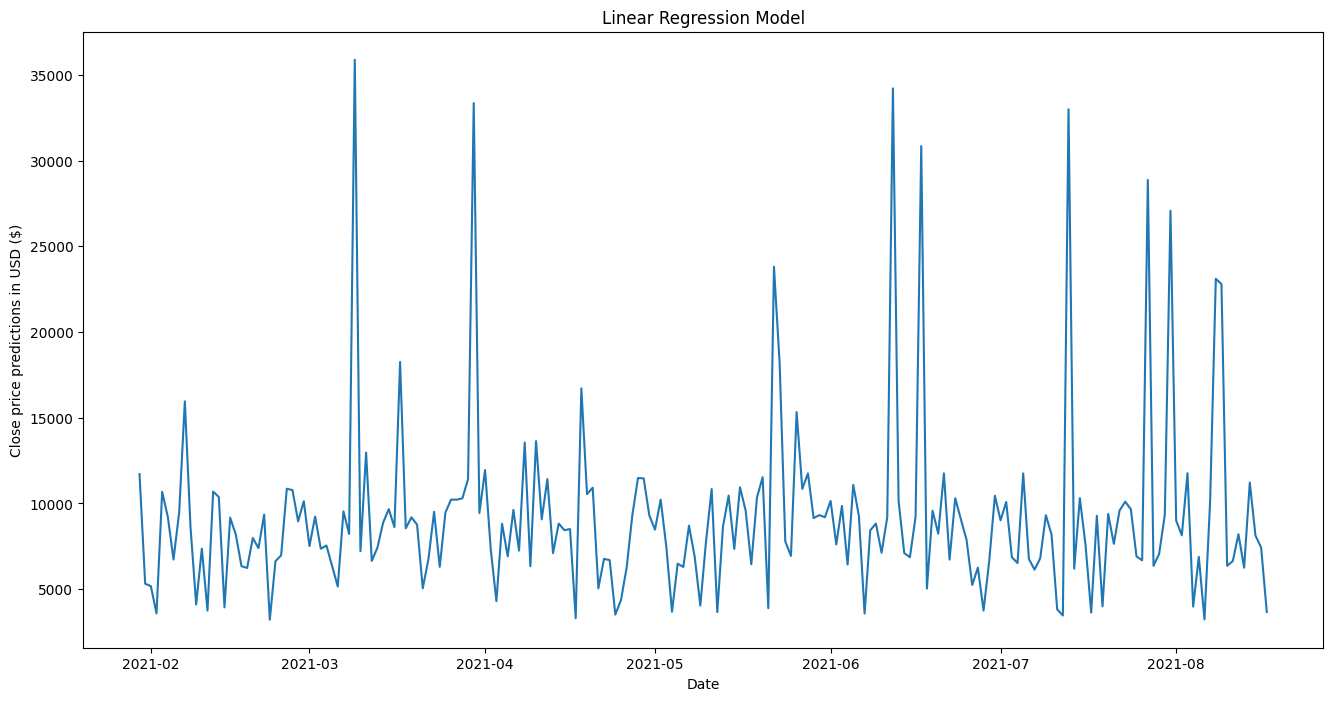

In [10]:
# Visualize the prediction data
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Date')
plt.ylabel('Close price predictions in USD ($)')
plt.plot(predictions_lr[:200])
plt.show()

## Random Forest Regressor Model

In [11]:
# this step ins't exactly needed as we have already performed it above
x = df.loc[:, df.columns != 'close_USD']
y = df['close_USD']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2,  random_state=random_seed)

In [12]:
# Scale the data
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [13]:
# tuning the parameters
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.2s
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.2s
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.2s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=2; total time=   0.2s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=2; total time=   0.2s
[CV] END bootstrap=True, max_depth=8, min_samples_leaf=13, min_samples_split=10, n_estimators=20, random_state=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=9, n_estimators=50, random_state=2; total time=   0.2s
[CV] 

In [14]:
# Apply the parameters to the model
model = RandomForestRegressor(random_state=1, n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=11, bootstrap=False)

# Train the model
model.fit(x_train, y_train)

# Use model to make predictions
y_pred = model.predict(x_test)

print(y_pred ,'\n')
print('Shape of data:\n-----------------------------------------')
print(y_pred.shape)

[11663.0606      5104.39135     5173.50752     3589.00771333
 10669.99186     9198.73255     6717.096175    9470.85276
 16147.22362     8614.43        4105.5564      7357.20457
  3769.19333333 10681.55194    10373.94606     3912.70669
  9175.68183     8173.021305    6346.71104     6239.391828
  7979.93        7384.36442     9353.77031     3224.17
  6625.195       6977.99146    10875.89561    10779.2575
  9010.227      10134.35        7503.53795     9232.82
  7358.50593     7559.52594     6346.71104     5166.07386
  9540.73108     8223.655      35954.55209     7203.383255
 13038.09022     6635.98        7412.41        8895.45814
  9678.87161333  8614.43       18380.83003     8557.70579
  9195.08        8753.57865     5027.79468     6739.94330667
  9509.32669     6296.46        9447.655935   10229.63
 10229.63       10298.85072    11399.45312    32720.3146
  9437.17408    11923.6524325   7333.91028     4279.40846
  8810.139375    6874.78052     9624.89        7256.203336
 13696.0363     

In [15]:
# Print out relevant metrics
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, y_pred), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')

errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 35.0863
Mean Squared Error: 9189.198
Root Mean Squared Error: 95.8603
(R^2) Score: 0.9997
Train Score : 100.00% and Test Score : 99.97% using Random Tree Regressor.
Accuracy: 99.71 %.


In [16]:
predictions = pd.DataFrame({"Predictions": y_pred}, index=pd.date_range(start=df.index[-1], periods=len(y_pred), freq="D"))
predictions.index.name = 'date'
predictions.to_csv("Predicted-price-data.csv")

twodays_df = pd.DataFrame(predictions[:3])
twodays_df.to_csv("two-days-prediction.csv")

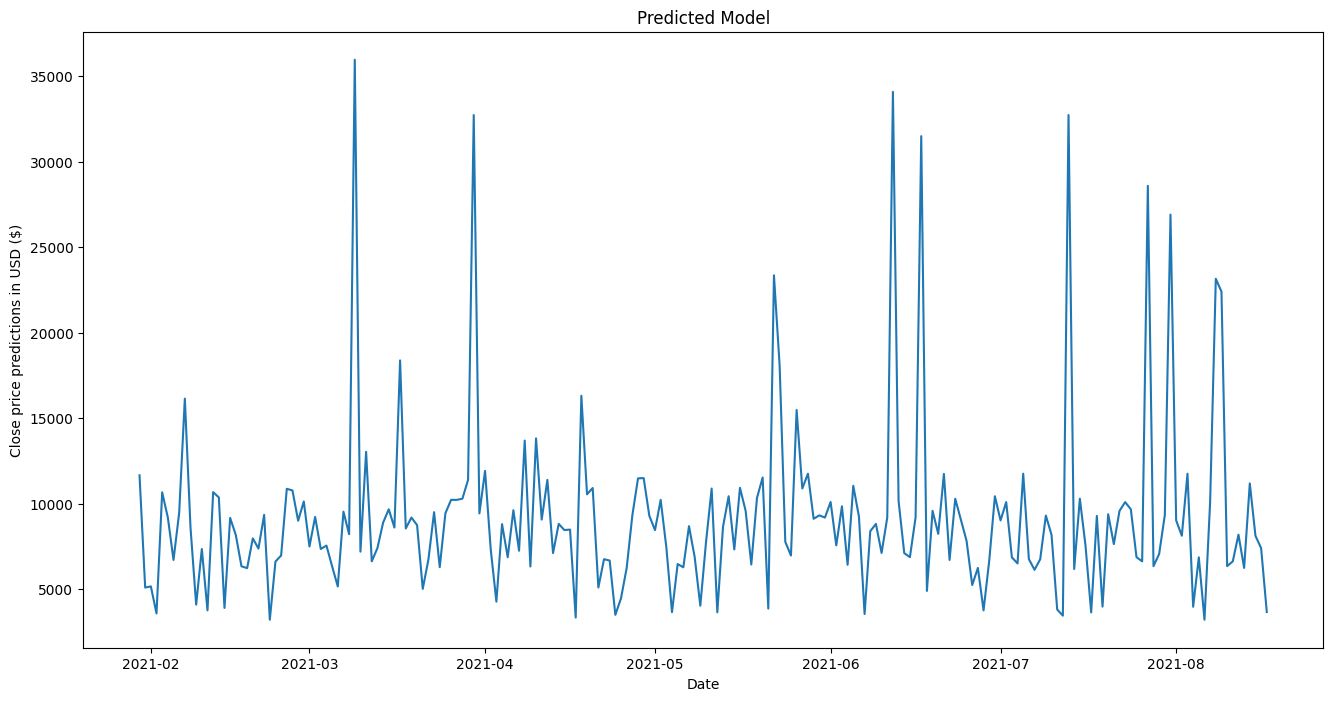

In [17]:
# Visualize the prediction data
plt.figure(figsize=(16,8))
plt.title('Predicted Model')
plt.xlabel('Date')
plt.ylabel('Close price predictions in USD ($)')
plt.plot(predictions['Predictions'])
plt.show()

Buy price and date
            Predictions
date                   
2021-01-31   5104.39135
Sell price and date
            Predictions
date                   
2021-01-30   11663.0606


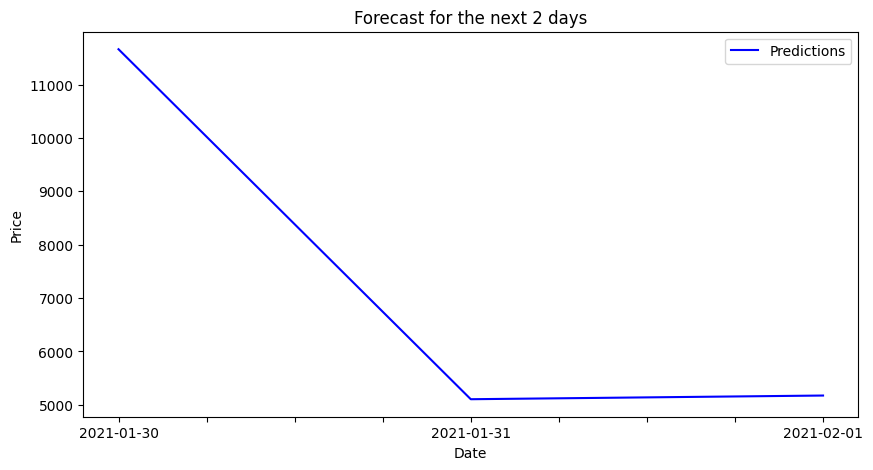

In [18]:
twodays_df = pd.read_csv("two-days-prediction.csv")
twodays_df.set_index("date", inplace=True)
buy_price = min(twodays_df["Predictions"])
sell_price = max(twodays_df["Predictions"])
fivedays_buy = twodays_df.loc[twodays_df["Predictions"] == buy_price]
fivedays_sell = twodays_df.loc[twodays_df["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)

twodays_df["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 2 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## Compare the two models

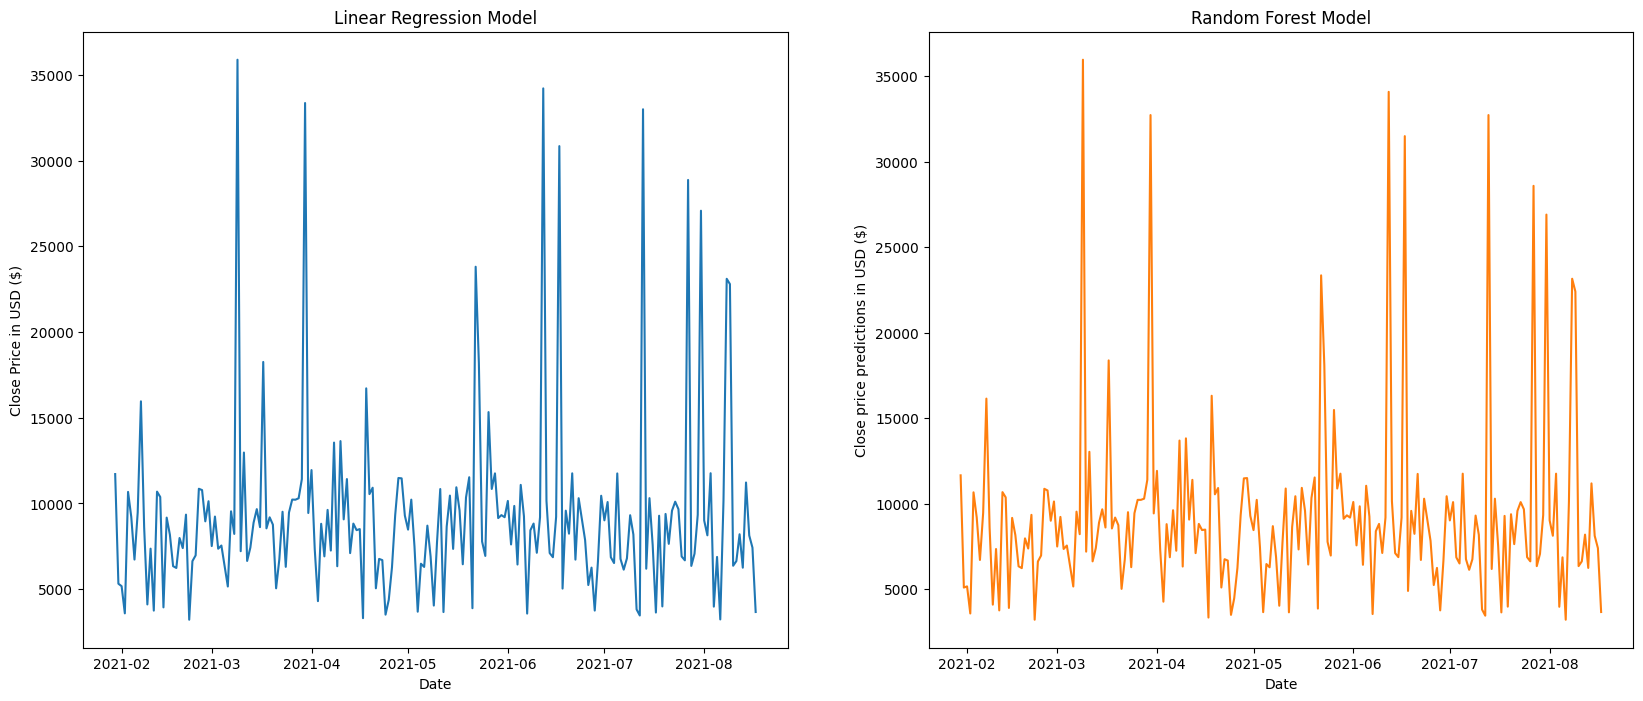

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

ax1.set_title('Linear Regression Model')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price in USD ($)')
ax1.plot(predictions_lr[:200])

ax2.set_title('Random Forest Model')
ax2.set_xlabel('Date')
ax2.set_ylabel('Close price predictions in USD ($)')
ax2.plot(predictions['Predictions'], 'tab:orange')